In [1]:
#importing library file
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import preprocessing 
#getting the data set
data= pd.read_csv('C:/Users/User/Downloads/the.csv')
# Showing the first five rows of train data set 
data.head()
data.loc[data['As'] <= 10, 'new_As'] = 'Unsafe' 
data.loc[data['As'] > 10, 'new_As'] = 'Safe' 
data['new_As']=pd.get_dummies(data.new_As, drop_first=True)
# Linear Model for the  train and test
y = data['new_As']
X = data.drop(['new_As', 'As','Type_of_well'], axis=1)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42,test_size=.23)

In [3]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=2)
model_H=clf.fit(X_train,y_train)
accuracy = round(model_H.score(X_test,y_test)*100,2)
print (accuracy)

91.36


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
select= SelectFromModel(RandomForestClassifier(n_estimators=10,random_state=32),threshold="median")

In [6]:
select.fit(X_train,y_train)
X_train_l1=select.transform(X_train)


In [7]:
X_test_L1=select.transform(X_test)
 

In [8]:
klf = DecisionTreeRegressor(max_depth=2)
model_k=klf.fit(X_train_l1,y_train)
accuracy = round(model_k.score(X_test_L1,y_test)*100,2)
print (accuracy)

91.36


In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_l1,y_train)
accuracy = round(lr.score(X_test_L1,y_test)*100,2)
print (accuracy)
y_pred=lr.predict(X_test_L1)

94.59


In [10]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred, target_names=["safe","unsafe"]))

             precision    recall  f1-score   support

       safe       0.91      1.00      0.95        20
     unsafe       1.00      0.88      0.94        17

avg / total       0.95      0.95      0.95        37



Text(0,0.5,'Recall')

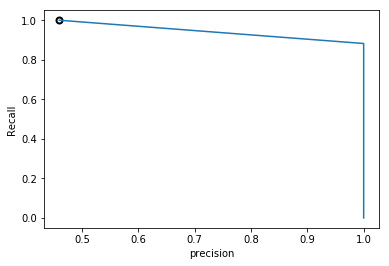

In [11]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds= precision_recall_curve(y_test,lr.predict(X_test_L1))
close_zero= np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("Recall")

In [12]:
from sklearn.metrics import roc_auc_score 
lr_auc = roc_auc_score(y_test,lr.predict(X_test_L1)) 
print("Auc for logistic regression without preprocessing: {:.3f}".format(lr_auc))

Auc for logistic regression without preprocessing: 0.941


In [13]:
lr.fit(X_train,y_train)
accuracy = round(lr.score(X_test,y_test)*100,2)
print (accuracy)
pred_logreg=lr.predict(X_test)

89.19


In [14]:
print(classification_report(y_test,pred_logreg, target_names=["safe","unsafe"]))

             precision    recall  f1-score   support

       safe       0.90      0.90      0.90        20
     unsafe       0.88      0.88      0.88        17

avg / total       0.89      0.89      0.89        37



In [15]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds= precision_recall_curve(y_test,lr.predict(X_test))

Text(0,0.5,'Recall')

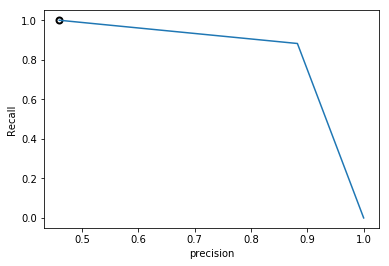

In [16]:
close_zero= np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("Recall")

In [17]:
from sklearn.metrics import roc_auc_score 
lr_auc = roc_auc_score(y_test,lr.predict(X_test)) 
print("Auc for logistic regression without preprocessing: {:.3f}".format(lr_auc))

Auc for logistic regression without preprocessing: 0.891
